## Aprendizado não supervisionado
### Aplicação do algorithm KMeans para clusterização de dados

In [5]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
input_file = 'train.csv'
columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 
           'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 
           'n_cores', 'pc', 'px_height', 'px_width', 'ram', 
           'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 
           'wifi', 'price_range', 'id']

# Load the data
df = pd.read_csv(input_file)

<Axes: xlabel='battery_power', ylabel='ram'>

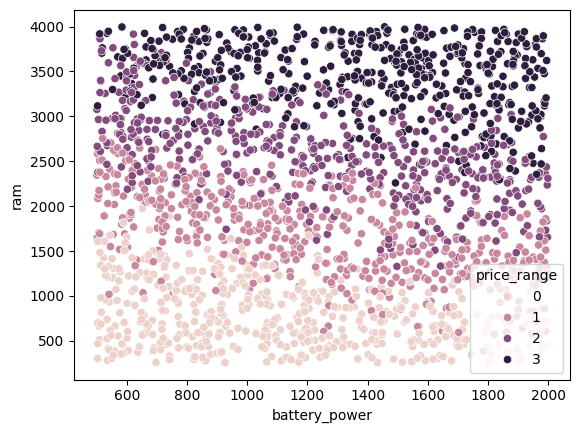

In [7]:
sns.scatterplot(x='battery_power', y='ram', hue='price_range', data=df)

In [8]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

In [9]:
# normalizing min max
# x_train = preprocessing.normalize(df)
features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
target = 'price_range'
x = df.loc[:, features].values
y = df.loc[:, target].values

x_minmax = MinMaxScaler().fit_transform(x)
normalized_minmax = pd.DataFrame(x_minmax, columns = features)
normalized_minmax = pd.concat([normalized_minmax, df[[target]]], axis = 1)


The similarity between the centroids and the problems objects is:  [5.6412961125157475, 11.067014840611701, 4.266795352901617, 12.299146517878864]


<Axes: xlabel='principal component 1', ylabel='principal component 2'>

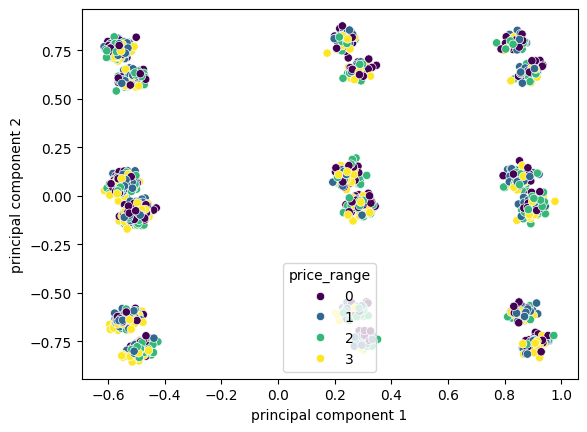

In [19]:
# k_clusters = range(0, 3)
k_clusters = 4
# k-centroids
kmeans = KMeans(n_clusters=k_clusters, random_state=0, n_init=1).fit(normalized_minmax)

#calculate the similarity between the centroids and the problems objects
centroids = kmeans.cluster_centers_
similarity = []
for i in range(k_clusters):
    similarity.append(centroids[i].dot(centroids[i]))
print("The similarity between the centroids and the problems objects is: ", similarity)

# TODO: calculate PCA 2 Components and substitute the x and y axis


# Assuming 'x' is your feature set and 'df' is your original DataFrame
# Normalize the data
x_minmax = MinMaxScaler().fit_transform(x)
normalized_minmax = pd.DataFrame(x_minmax, columns=features)
normalized_minmax = pd.concat([normalized_minmax, df[[target]]], axis=1)

# Perform PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_minmax)

# Create a DataFrame with the principal components
principal_breast_Df = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Add the target variable to the principal component DataFrame
principal_breast_Df[target] = df[target].values

# Plot the scatter plot
sns.scatterplot(x='principal component 1', y='principal component 2', hue=target, data=principal_breast_Df, palette='viridis')

# Ajustar a posição da legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Axes: >

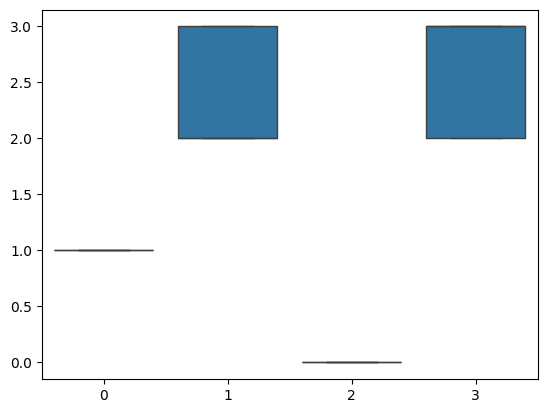

In [11]:
#TODO: plot the boxplot
sns.boxplot(x=kmeans.labels_, y=y, data=normalized_minmax)

In [12]:

# calculate the silhouette score
silhouette_avg = silhouette_score(normalized_minmax, kmeans.labels_, metric='euclidean')
print("The average silhouette_score is :", silhouette_avg)

# Add the cluster labels to the dataframe
df['cluster'] = kmeans.labels_

The average silhouette_score is : 0.09154181603978097


In [13]:
k_clusters_range = range(0, 4)  # Start from 1 to 2, resulting in 2 to 3 clusters
fits = []
scores = []

for k in k_clusters_range:
    kmeans = KMeans(n_clusters=k+1, random_state=0, n_init=1).fit(normalized_minmax)
    fits.append(kmeans)
    labels = kmeans.labels_
    if len(set(labels)) > 1:  # Check if we have more than one cluster
        score = silhouette_score(normalized_minmax, labels, metric='euclidean')
        scores.append(score)
    else:
        scores.append(None)  # Or handle the case where there's only one cluster in some other way

# Printing scores to verify output
for idx, sc in enumerate(scores):
    print(f"Silhouette score for {idx+1} clusters: {sc}")


Silhouette score for 1 clusters: None
Silhouette score for 2 clusters: 0.2329661137625949
Silhouette score for 3 clusters: 0.11723422618166422
Silhouette score for 4 clusters: 0.09154181603978097


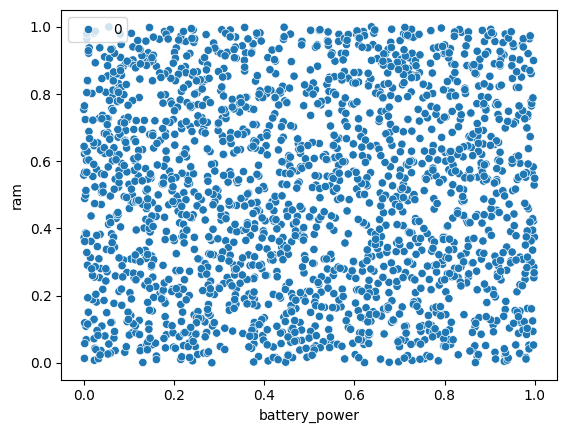

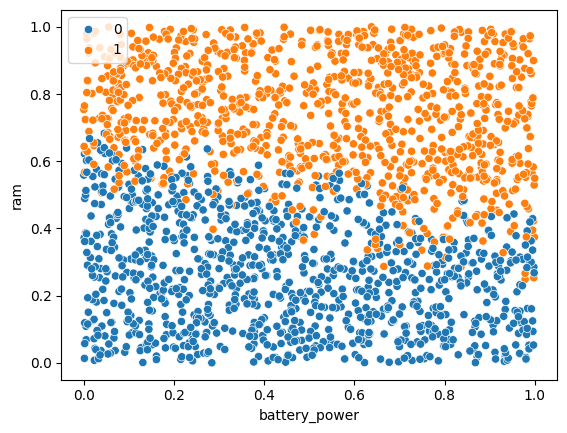

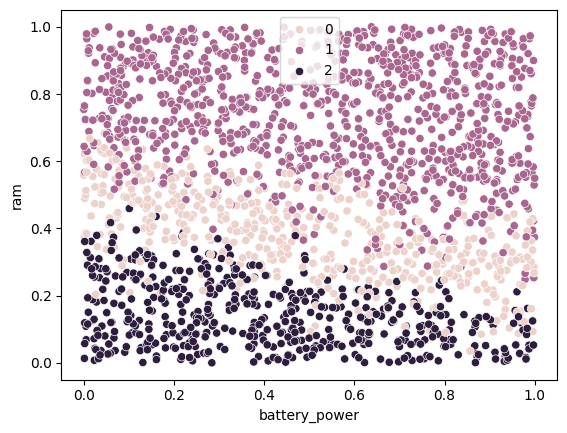

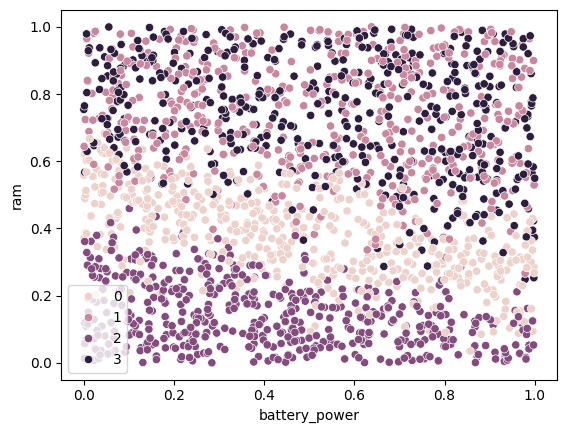

In [14]:
for i in range(0, 4):
    sns.scatterplot(data = normalized_minmax, x = 'battery_power', y = 'ram', hue = fits[i].labels_)
    plt.show()

<Axes: >

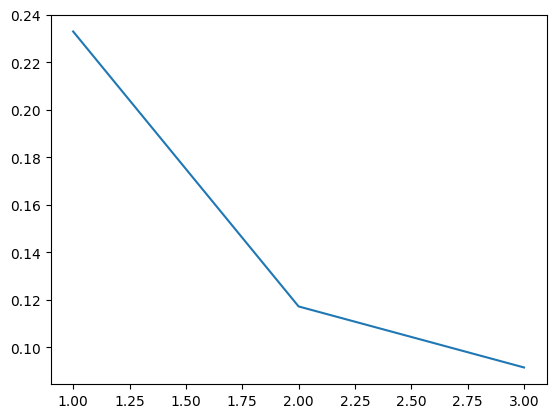

In [15]:
sns.lineplot(x = k_clusters_range, y = scores)

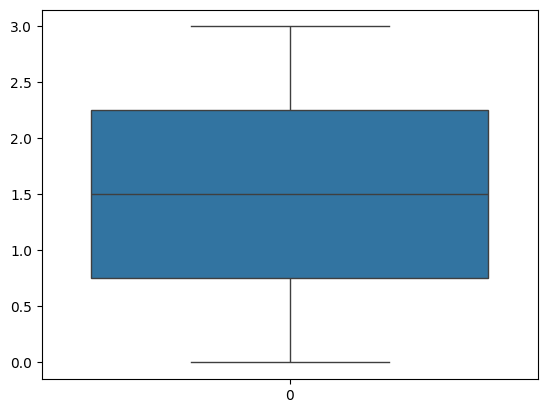

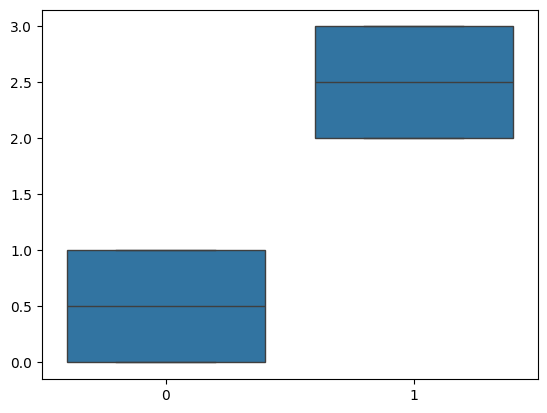

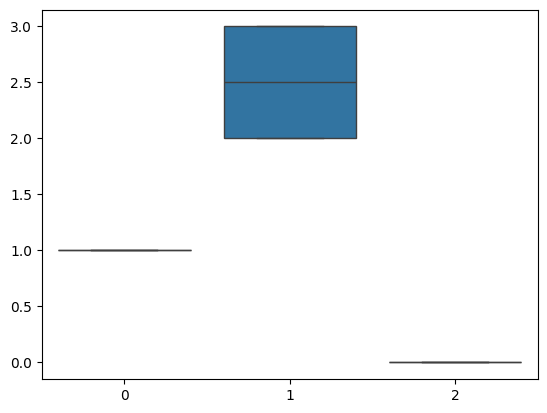

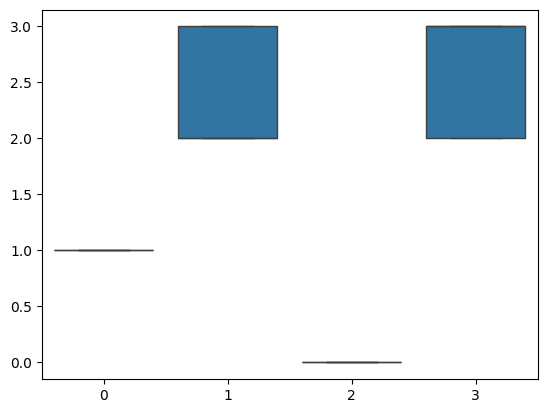

In [16]:
for i in range (0, 4):
    sns.boxplot(x = fits[i].labels_, y = y)
    plt.show()